# Tugas Individu 3
## Classifier menggunakan back propagation ANN
Kevin Darmawan(1806148744) 

**Referensi** :
- https://www.kaggle.com/antmarakis/another-neural-network-from-scratch
- https://emas2.ui.ac.id/pluginfile.php/1391930/mod_resource/content/0/Classifier%20berbasis%20ANN.pdf 
- https://github.com/teachtomachines/one-hot-encoding/blob/master/One-Hot%20Encoding.ipynb

### 1 : Import library dan data

In [1]:
import numpy as np #untuk mathematical operations
import pandas as pd #untuk membaca dataset
import matplotlib.pyplot as plt #untuk plotting

In [2]:
# Menggunakan dataset iris dengan load file CSV
iris = pd.read_csv("Iris.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### 2 : Melakukan One Hot Encoding
One Hot encoding dilakukan untuk mengencode data kategori dimana Iris memliliki class dengan label string, diubah ke nilai biner 0 dan 1. One Hot Encoding mempermudah untuk merepresentasikan data sebagai matrix dalam pemrosesan pada Feedforward dan Back propagation.

In [3]:
# One hot encoding
iris = pd.get_dummies(iris, columns = ['Species']) # buat separate column
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_Iris-setosa,Species_Iris-versicolor,Species_Iris-virginica
0,1,5.1,3.5,1.4,0.2,1,0,0
1,2,4.9,3.0,1.4,0.2,1,0,0
2,3,4.7,3.2,1.3,0.2,1,0,0
3,4,4.6,3.1,1.5,0.2,1,0,0
4,5,5.0,3.6,1.4,0.2,1,0,0


### 3 : Melakukan splitting untuk training dan testing data
Pembagian data training dan testing dengan rasio 70-30: 

a. Data training = 35 data pertama dari setiap kelas → total 105 data training

b. Data testing = 15 data terakhir dari setiap kelas → total 45 data testing

In [4]:
# Randomize tiap class
setosa = iris.loc[0:50]
versicolor = iris.loc[50:100]
virginica = iris.loc[100:150]

setosa_shuffled=setosa.sample(frac=1).reset_index(drop=True)
versicolor_shuffled=versicolor.sample(frac=1).reset_index(drop=True)
virginica_shuffled=virginica.sample(frac=1).reset_index(drop=True)
 
# Gabungkan kembali
iris = pd.concat([setosa_shuffled, versicolor_shuffled, virginica_shuffled])
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_Iris-setosa,Species_Iris-versicolor,Species_Iris-virginica
0,49,5.3,3.7,1.5,0.2,1,0,0
1,24,5.1,3.3,1.7,0.5,1,0,0
2,11,5.4,3.7,1.5,0.2,1,0,0
3,38,4.9,3.1,1.5,0.1,1,0,0
4,20,5.1,3.8,1.5,0.3,1,0,0


In [5]:
# Mengubah dataframe ke numpy array
X = iris[iris.columns[1:5]]
X = np.array(X)
print(X[:5])
print(type(X))

Y = iris[iris.columns[5:]]
Y = np.array(Y)
print(Y[:5])
print(type(Y))

# Split training data sesuai requirement
X_train = X[np.r_[0:35, 50:85, 100:135]]
Y_train = Y[np.r_[0:35, 50:85, 100:135]]
                   
X_test = X[np.r_[35:50, 85:100, 135:150]]
Y_test = Y[np.r_[35:50, 85:100, 135:150]]

[[5.3 3.7 1.5 0.2]
 [5.1 3.3 1.7 0.5]
 [5.4 3.7 1.5 0.2]
 [4.9 3.1 1.5 0.1]
 [5.1 3.8 1.5 0.3]]
<class 'numpy.ndarray'>
[[1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]]
<class 'numpy.ndarray'>


In [25]:
print(type(X_train))
X_train[:5]

<class 'numpy.ndarray'>


array([[5.3, 3.7, 1.5, 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [5.4, 3.7, 1.5, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.1, 3.8, 1.5, 0.3]])

In [7]:
print(type(X_test))
X_test[:5]

<class 'numpy.ndarray'>


array([[4.7, 3.2, 1.6, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [4.6, 3.1, 1.5, 0.2],
       [4.5, 2.3, 1.3, 0.3],
       [7. , 3.2, 4.7, 1.4]])

In [8]:
print(type(Y_train))
Y_train[:5]

<class 'numpy.ndarray'>


array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]], dtype=uint8)

In [9]:
print(type(Y_test))
Y_test[:5]

<class 'numpy.ndarray'>


array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0]], dtype=uint8)

###  4 : Membuat fungsi utama ANN
fungsi ini memiliki parameter untuk memasukkan data training, nilai validasi, mengatur epoch (iterasi), jumlah node untuk setiap layer dan learning rate.

In [10]:
def NeuralNetwork(X_train, Y_train, X_val=None, Y_val=None, epochs=100, nodes=[], lr=0.10):
    hidden_layers = len(nodes) - 1
    weights = InitWeights(nodes)

    for epoch in range(1, epochs+1):
        weights = Train(X_train, Y_train, lr, weights)

        if(epoch % 20 == 0):
            print("Epoch {}".format(epoch))
            print("Training Accuracy:{}".format(AccuracyScore(X_train, Y_train, weights)))
            if X_val.any():
                print("Validation Accuracy:{}".format(AccuracyScore(X_val, Y_val, weights)))
            
    return weights

### 5 : Inisialisasi weight
Inisialisasi weight dilakukan dengan metode random dalam range [-0.5, 0,5] menggunakan fungsi ktia menginput node dan menghasilkan weight berupa multidimensional array. Elemen weights merepresntasikan hidden layer dan weight dari layer sebelumnya.

In [11]:
def InitWeights(nodes):
    """Inisialisasi weights dengan nilai random range [-0.5, 0.5] (termasuk bias)"""
    layers, weights = len(nodes), []
    
    for i in range(1, layers):
        w = [[np.random.uniform(-0.5, 0.5) for k in range(nodes[i-1] + 1)]
              for j in range(nodes[i])]
        weights.append(np.matrix(w))
    
    return weights

### 6 : Fungsi Forward Propagation
Setiap layer menerima input dan menghasilkan output dari dot product input dan weight tiap layer untuk dikirimkan ke activation function (sigmoid function)
- mengkalkulasi nilai input untuk hidden neuron
- memasukkan nilai input kedalam fungsi sigmoid menghasilkan output hidden unit
- output hidden unit dikirim ke layer setelahnya

In [12]:
def ForwardPropagation(x, weights, layers):
    activations, layer_input = [x], x
    for j in range(layers):
        activation = Sigmoid(np.dot(layer_input, weights[j].T))
        activations.append(activation)
        layer_input = np.append(1, activation) # Augmentasikan weight baru dengan bias
    
    return activations

### 7 : Fungsi Backward Propagation
Fungsi ini menghitung error pada hasil akhir, kalkulasi yang dilakukan :
- kalkulasi error hidden layer ke output layer
- memperbaiki bias dari hidden layer ke output layer
- mengkalkulasi delta

In [13]:
def BackPropagation(y, activations, weights, layers):
    outputFinal = activations[-1]
    error = np.matrix(y - outputFinal) # Nilai error pada output
    
    for j in range(layers, 0, -1):
        currActivation = activations[j]
        
        if(j > 1):
            # Tambahkan hasil sigmoid sebelumnya
            prevActivation = np.append(1, activations[j-1])
        else:
            # Hidden layer pertama, prevActivation adalah input tanpa bias
            prevActivation = activations[0]
        
        delta = np.multiply(error, SigmoidDerivative(currActivation))
        weights[j-1] += lr * np.multiply(delta.T, prevActivation)

        w = np.delete(weights[j-1], [0], axis=1) # Menghilangkan bias dari weights
        error = np.dot(delta, w) # Menghitung nilai error untuk layer ini
    
    return weights

### 8 : Melakukan training
Mengkalkulasi weight baru dengan melakukan forward propagation diikuti weight updating menggunakan back propagation

In [14]:
def Train(X, Y, lr, weights):
    layers = len(weights)
    for i in range(len(X)):
        x, y = X[i], Y[i]
        x = np.matrix(np.append(1, x)) # Memasukkan vector berisi features
        
        activations = ForwardPropagation(x, weights, layers)
        weights = BackPropagation(y, activations, weights, layers)

    return weights

### 9 : Activation function (sigmoid function)

In [15]:
def Sigmoid(x):
    return 1 / (1 + np.exp(-x))

def SigmoidDerivative(x):
    return np.multiply(x, 1-x)

### 10 : Fungsi testing 
melakukan prediksi berdasarkan forward propagation dan konversi output dalam bentuk one-hot encoding

In [16]:
def Predict(item, weights):
    layers = len(weights)
    item = np.append(1, item) # Memasukkan vector berisi features
    
    ##_Forward Propagation_##
    activations = ForwardPropagation(item, weights, layers)
    
    outputFinal = activations[-1].A1
    index = FindMaxActivation(outputFinal)

    # Inisialisasikan prediction vector dengan nilai 0
    y = [0 for i in range(len(outputFinal))]
    y[index] = 1  # Set class yang diprediksi ke 1

    return y # Return prediction vector


def FindMaxActivation(output):
    """Mencari max activation dalam output"""
    m, index = output[0], 0
    for i in range(1, len(output)):
        if(output[i] > m):
            m, index = output[i], i
    
    return index

### 11 : Fungsi accuracy score
persentase keberhasilan menggunakan recognition rate

In [17]:
def AccuracyScore(X, Y, weights):
    """Masukkan set pada ANN, kalkulasikan akurasi keseluruhan"""
    correct = 0

    for i in range(len(X)):
        x, y = X[i], list(Y[i])
        guess = Predict(x, weights)

        if(y == guess):
            # Hasil prediksi yang benar
            correct += 1

    return correct / len(X)

### 12 : Menguji coba model ANN classifier dengan variasi hyperparameter

In [18]:
f = len(X[0]) # Jumlah feature
o = len(Y[0]) # Jumlah output / class

layers = [f, 5, 10, o] # Jumlah node tiap layer

#### A) Menggunakan hyperparameter (learning rate = 0.10 dan epoch = 100)

In [19]:
lr, epochs = 0.10, 100
weights = NeuralNetwork(X_train, Y_train, X_test, Y_test, epochs=epochs, nodes=layers, lr=lr);

training1 = AccuracyScore(X_train, Y_train, weights)
testing1 = AccuracyScore(X_test, Y_test, weights)

Epoch 20
Training Accuracy:0.6666666666666666
Validation Accuracy:0.6444444444444445
Epoch 40
Training Accuracy:0.6761904761904762
Validation Accuracy:0.6444444444444445
Epoch 60
Training Accuracy:0.7238095238095238
Validation Accuracy:0.6444444444444445
Epoch 80
Training Accuracy:0.8095238095238095
Validation Accuracy:0.8222222222222222
Epoch 100
Training Accuracy:0.8476190476190476
Validation Accuracy:0.8888888888888888


#### B) Menggunakan hyperparameter (learning rate = 0.20 dan epoch = 250) 

In [20]:
lr, epochs = 0.20, 250
weights = NeuralNetwork(X_train, Y_train, X_test, Y_test, epochs=epochs, nodes=layers, lr=lr);

training2 = AccuracyScore(X_train, Y_train, weights)
testing2 = AccuracyScore(X_test, Y_test, weights)

Epoch 20
Training Accuracy:0.3238095238095238
Validation Accuracy:0.3333333333333333
Epoch 40
Training Accuracy:0.3619047619047619
Validation Accuracy:0.3333333333333333
Epoch 60
Training Accuracy:0.7904761904761904
Validation Accuracy:0.8222222222222222
Epoch 80
Training Accuracy:0.8952380952380953
Validation Accuracy:0.9333333333333333
Epoch 100
Training Accuracy:0.9333333333333333
Validation Accuracy:0.9777777777777777
Epoch 120
Training Accuracy:0.9047619047619048
Validation Accuracy:0.9333333333333333
Epoch 140
Training Accuracy:0.7333333333333333
Validation Accuracy:0.7111111111111111
Epoch 160
Training Accuracy:0.9619047619047619
Validation Accuracy:0.9777777777777777
Epoch 180
Training Accuracy:0.9619047619047619
Validation Accuracy:0.9777777777777777
Epoch 200
Training Accuracy:0.9523809523809523
Validation Accuracy:0.9555555555555556
Epoch 220
Training Accuracy:0.9619047619047619
Validation Accuracy:0.9777777777777777
Epoch 240
Training Accuracy:0.9619047619047619
Validation 

#### c) Menggunakan hyperparameter (learning rate = 0.6 dan epoch = 500)

In [21]:
lr, epochs = 0.60, 500
weights = NeuralNetwork(X_train, Y_train, X_test, Y_test, epochs=epochs, nodes=layers, lr=lr);

training3 = AccuracyScore(X_train, Y_train, weights)
testing3 = AccuracyScore(X_test, Y_test, weights)

Epoch 20
Training Accuracy:0.3238095238095238
Validation Accuracy:0.3333333333333333
Epoch 40
Training Accuracy:0.7047619047619048
Validation Accuracy:0.6444444444444445
Epoch 60
Training Accuracy:0.8
Validation Accuracy:0.8444444444444444
Epoch 80
Training Accuracy:0.6857142857142857
Validation Accuracy:0.6444444444444445
Epoch 100
Training Accuracy:0.6666666666666666
Validation Accuracy:0.6444444444444445
Epoch 120
Training Accuracy:0.6666666666666666
Validation Accuracy:0.6444444444444445
Epoch 140
Training Accuracy:0.6666666666666666
Validation Accuracy:0.6444444444444445
Epoch 160
Training Accuracy:0.6666666666666666
Validation Accuracy:0.6444444444444445
Epoch 180
Training Accuracy:0.6666666666666666
Validation Accuracy:0.6444444444444445
Epoch 200
Training Accuracy:0.6666666666666666
Validation Accuracy:0.6444444444444445
Epoch 220
Training Accuracy:0.6666666666666666
Validation Accuracy:0.6444444444444445
Epoch 240
Training Accuracy:0.6666666666666666
Validation Accuracy:0.6444

#### D) Menggunakan hyperparameter (learning rate = 0.05 dan epoch = 500)

In [22]:
lr, epochs = 0.05, 500
weights = NeuralNetwork(X_train, Y_train, X_test, Y_test, epochs=epochs, nodes=layers, lr=lr);

training4 = AccuracyScore(X_train, Y_train, weights)
testing4 = AccuracyScore(X_test, Y_test, weights)

Epoch 20
Training Accuracy:0.3238095238095238
Validation Accuracy:0.3333333333333333
Epoch 40
Training Accuracy:0.6666666666666666
Validation Accuracy:0.6444444444444445
Epoch 60
Training Accuracy:0.6761904761904762
Validation Accuracy:0.6444444444444445
Epoch 80
Training Accuracy:0.6952380952380952
Validation Accuracy:0.6444444444444445
Epoch 100
Training Accuracy:0.7142857142857143
Validation Accuracy:0.6444444444444445
Epoch 120
Training Accuracy:0.7523809523809524
Validation Accuracy:0.7333333333333333
Epoch 140
Training Accuracy:0.819047619047619
Validation Accuracy:0.8444444444444444
Epoch 160
Training Accuracy:0.8666666666666667
Validation Accuracy:0.8666666666666667
Epoch 180
Training Accuracy:0.9142857142857143
Validation Accuracy:0.9333333333333333
Epoch 200
Training Accuracy:0.9238095238095239
Validation Accuracy:0.9333333333333333
Epoch 220
Training Accuracy:0.9428571428571428
Validation Accuracy:0.9555555555555556
Epoch 240
Training Accuracy:0.9428571428571428
Validation A

### Rekapitulasi hasil recognition

In [23]:
recData = np.array([[training1, testing1],[training2, testing2],[training3, testing3],[training4, testing4]])

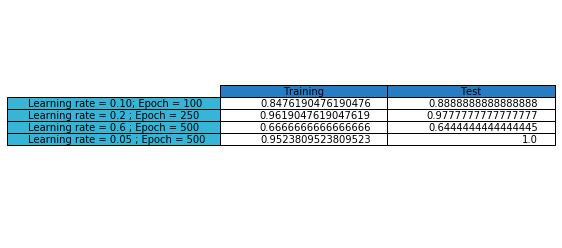

In [24]:
fig, ax =plt.subplots(1,1)
column_labels=["Training", "Test"]
df=pd.DataFrame(recData,columns=column_labels)
ax.axis('tight')
ax.axis('off')
ax.table(cellText=df.values,
        colLabels=df.columns,
        rowLabels=['Learning rate = 0.10; Epoch = 100', 
                   'Learning rate = 0.2 ; Epoch = 250', 
                   'Learning rate = 0.6 ; Epoch = 500', 
                   'Learning rate = 0.05 ; Epoch = 500'],
        rowColours =["#36b5d9"] * 4,  
        colColours =["#267dc5"] * 2,
        loc="center")
plt.show()